In [27]:
#Library Imports ------------------------------
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, Data, RealData

In [28]:
#Data -----------------------------------------

#object distance s [m]
obj = [0.482,0.32,0.725,0.37,0.09,0.11,-0.26,-0.4]

#image distance s' [m]
img = [0.181,0.228,0.17,0.208,-0.705,-0.287,0.092,0.104]

#Loop to determine focal length / convert data to object and image vergence and optical power

foc = []      #focal distance f [m]                                                                   
v_obj = []    #object vergence V [D]
v_img = []    #image vergence V' [D]
power = []    #optical power P [D]

for index in range(len(obj)):
    f = 1/((1/obj[index])+(1/img[index]))  #1/f = 1/s + 1/s' [m]
    foc.append(f)
    v_obj.append(1/obj[index])         #V = 1/s [D]
    v_img.append(1/img[index])         #V' = 1/s' [D]
    p = (1/obj[index])+(1/img[index])  #P = V + V' [D]
    power.append(p)


In [29]:
#Nonlinear Error Analysis ---------------------

#object distance error [m]
xerr = [0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001]

#image distance error [m]
yerr = [0.0009,0.001,0.004,0.0018,0.0022,0.0018,0.0007,0.0006]

#Function appropriate for fitting data; object distance s and focal length f as parameters to find image distance s'
def img_curvefit(params, s):
    return (s*params[0])/(s-params[0])

#Container with object and image distances plus respective errors
data = RealData(obj, img, xerr, yerr)

#Container for model function
model = Model(img_curvefit)

#Compute odr curvefit
pguess = [0.13]
odr = ODR(data, model, pguess)
output = odr.run()
print(output.beta, output.sd_beta)

#Loop to determine residual data
residuals = []

for index in range(len(img)):
    residuals.append(img_curvefit(output.beta, obj[index])-img[index])

[0.13293712] [0.00295777]


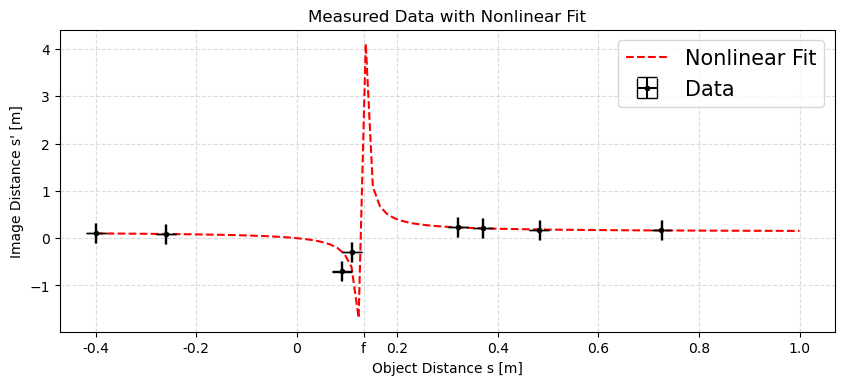

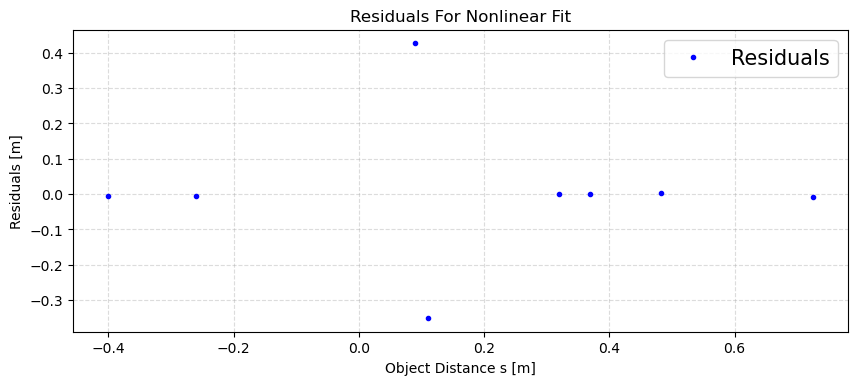

In [31]:
#Plotting Nonlinear Data and Residuals --------

#Range of object distances [m]
obj_theory = np.linspace(-0.4,1,100)

#s vs s'
plt.figure(figsize=(10,4),dpi=100)
plt.plot(obj_theory, img_curvefit(output.beta, obj_theory), linestyle='dashed', color='red', label='Nonlinear Fit')
plt.errorbar(obj, img, yerr, xerr, capsize=7, fmt='k.', label='Data')
plt.grid(True, alpha=0.4, linestyle='dashed', color='darkgray')
plt.xlabel('Object Distance s [m]')
plt.ylabel("Image Distance s' [m]")
plt.title('Measured Data with Nonlinear Fit')
plt.xticks([-0.4,-0.2,0,output.beta[0],0.2,0.4,0.6,0.8,1.0],['-0.4','-0.2','0','f','0.2','0.4','0.6','0.8','1.0'])
plt.legend(prop={'size':15})
plt.rcParams['legend.loc'] = 'upper right'
plt.show()

#Residuals
plt.figure(figsize=(10,4),dpi=100)
plt.plot(obj, residuals, marker='.', linestyle='None', color='blue', label='Residuals')
plt.grid(True, alpha=0.4, linestyle='dashed', color='darkgray')
plt.xlabel('Object Distance s [m]')
plt.ylabel('Residuals [m]')
plt.title('Residuals For Nonlinear Fit')
plt.legend(prop={'size':15})
plt.rcParams['legend.loc'] = 'upper right'
plt.show()

In [32]:
#Linear Error Analysis ------------------------

#Loop to determine object vergence error [D]
x2err = []

for index in range(len(xerr)):
    x2err.append(xerr[index]/(obj[index]**2))
    
#Loop to determine image vergence error [D]
y2err = []

for index in range(len(yerr)):
    y2err.append(yerr[index]/(img[index]**2))
    
#Function appropriate for fitting data; object vergence v and optical power p as parameters to find image vergence v'
def v_img_curvefit(params, v):
    return (params[0]-v)

#Container with object and image distances plus respective errors
data2 = RealData(v_obj, v_img, x2err, y2err)

#Container for model function
model2 = Model(v_img_curvefit)

#Compute odr curvefit
pguess2 = [7.69]
odr2 = ODR(data2, model2, pguess2)
output2 = odr2.run()
print(output2.beta, output2.sd_beta)

#Loop to determine residual data
residuals2 = []

for index in range(len(v_img)):
    residuals2.append(v_img_curvefit(output2.beta, v_obj[index])-v_img[index])
    


[7.46595687] [0.16467726]


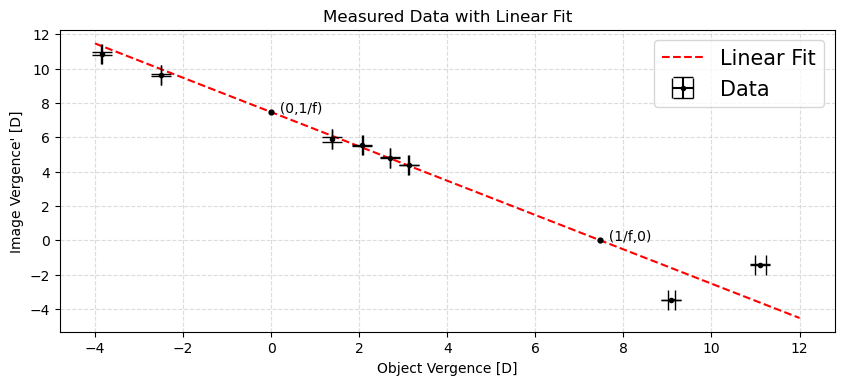

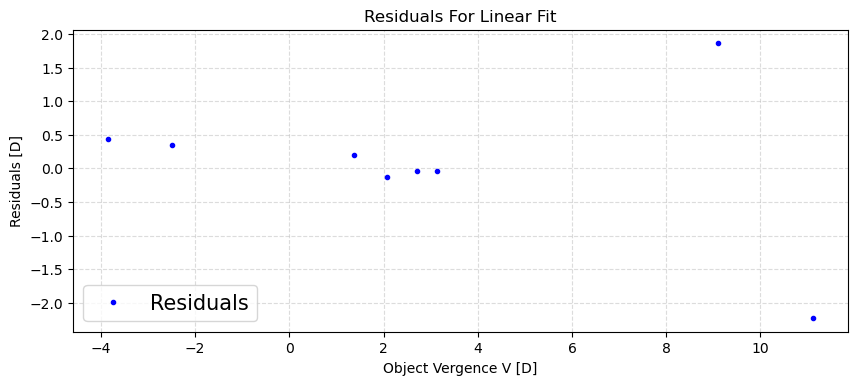

In [33]:
#Plotting Linear Data and Residuals -----------

#Range of object distances [m]
v_obj_theory = np.linspace(-4,12,100)

#Adding points (0,1/f) and (1/f,0) to plot
intersect = output2.beta[0]
x_intersects = [0,intersect]
y_intersects = [intersect,0]

#V vs V'
plt.figure(figsize=(10,4),dpi=100)
plt.plot(v_obj_theory, v_img_curvefit(output2.beta, v_obj_theory), linestyle='dashed', color='red', label='Linear Fit')
plt.plot(x_intersects, y_intersects, marker='.', markersize=7, linestyle='None', color='black')
plt.errorbar(v_obj, v_img, y2err, x2err, capsize=7, fmt='k.', label='Data')
plt.grid(True, alpha=0.4, linestyle='dashed', color='darkgray')
plt.xlabel('Object Vergence [D]')
plt.ylabel("Image Vergence' [D]")
plt.title('Measured Data with Linear Fit')
plt.annotate('  (1/f,0)',(intersect,0))
plt.annotate('  (0,1/f)',(0,intersect))
plt.legend(prop={'size':15})
plt.rcParams['legend.loc'] = 'lower left'
plt.show()

#Residuals
plt.figure(figsize=(10,4),dpi=100)
plt.plot(v_obj, residuals2, marker='.', linestyle='None', color='blue', label='Residuals')
plt.grid(True, alpha=0.4, linestyle='dashed', color='darkgray')
plt.xlabel('Object Vergence V [D]')
plt.ylabel('Residuals [D]')
plt.title('Residuals For Linear Fit')
plt.legend(prop={'size':15})
plt.rcParams['legend.loc'] = 'lower left'
plt.show()